In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
boid_count = 10 #number of boids

In [18]:
limits = np.array([2000,2000]) #ensures the boundaries for positions of the each boid is clear

In [19]:
positions = np.random.rand(2, boid_count) * limits[:, np.newaxis] #setting random locations for each of the boids with the limits mentioned
positions

array([[ 319.03260086, 1677.87883105,  691.97641024, 1492.22539547,
         405.56202332,  241.94479489,   86.47163434, 1538.32419211,
        1357.34528131, 1942.87708666],
       [  56.48622273,  607.53906349, 1139.58484584,  949.11581116,
          19.47188279, 1074.54276578,   85.0980474 , 1767.80996515,
         260.99451266,  242.91364061]])

In [20]:
def new_velocities(count, lower_limit, upper_limit):
    width = upper_limit - lower_limit
    return (lower_limit[:, np.newaxis] + np.random.rand(2, count)*width[:, np.newaxis])

In [21]:
velocities = new_velocities(boid_count, np.array([0, -20]), np.array([10, 20])) #putting limits on x and y velocities as [0,10] and [-20, 20] respectively
velocities

array([[  4.30579451,   0.59284378,   1.87393073,   9.00377263,
          0.29945075,   7.59029479,   9.26542364,   2.15540179,
          9.56106222,   5.5505481 ],
       [  5.02747924,  -2.59140509,  14.27093221,  12.72291429,
        -10.83418051,  19.09797087,   7.50898234,  12.43282603,
        -14.16547341, -11.12744052]])

In [11]:
# Let's assume the flock moves in a straight line
# This is the amazingness of numpy where if we want to do dx = dt. (dv/dt) , we just have to type the code below:
# positions += velocities

In [22]:
from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib inline

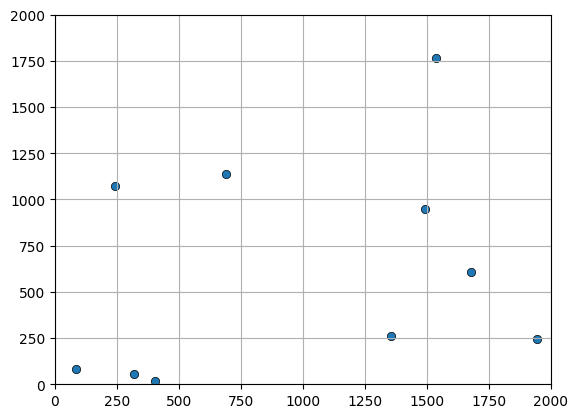

In [23]:
figure = plt.figure()
axes = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))
scatter = axes.scatter(positions[0, :], positions[1, :],
                       marker='o', edgecolor='k', lw=0.5); axes.grid(True)
scatter

In [24]:
def update_boids(positions, velocities):
    positions += velocities #Updating positions based on the velocities and assuming the boids move in a straight line


def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

In [26]:
anim = animation.FuncAnimation(figure, animate, frames=50, interval=50)

In [28]:
from IPython.display import HTML
HTML(anim.to_jshtml())